Author: François d'Entremont<br> 
Date: April 18, 2023<br> 
Course: GDAA2010

In this notebook, we will leverage the TensorFlow package to build Deep Learning pipelines for making predictions on unstructured data. The data used will be images of kittens and puppies. The images have been downloaded from the internet using the "Download All Images" extension in Google Chrome and doing a google images search.

Artificial Neural Networks consist of interconnected groups of artificial neurons that use mathematical and computational models for information processing similar to neurons in the human brain. Each layer in the model performs a specific computation on the input data, transforming it into a more useful representation for the next layer. This process continues through each layer in the model until the final output is produced.

In [2]:
# import packages
import os

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
from PIL import Image

## 2. Load and Prepare the Image Data

For this example, we will training an image classification model using web-scraped images of puppies and kittens.
https://unsplash.com/images/animals/puppies <br>
https://unsplash.com/images/animals/kitten

Using the DOWNLOAD ALL IMAGES plugin and unzipping the contents, I noticed that the images starting with "photo-" are high resolution images and the rest is just thumbnail images or other website images. So we will write code to only include the images beginning with "photo-"
First, we will load the 'os' library to filter our image data. 

In [3]:
# specify the directory that contains your data
data_path = 'D:/GDAA2010_Data_Modeling/Assignment2/data/'
kitten_path = 'D:/GDAA2010_Data_Modeling/Assignment2/data/Kitten/'
puppy_path = 'D:/GDAA2010_Data_Modeling/Assignment2/data/Puppy/'


In [4]:
# All the images are of the format .jpg
# Loop through all files in the kitten folder
for filename in os.listdir(kitten_path):
    # Check if the file starts with "Photo-"
    if not filename.startswith("photo-"):
        # If it doesn't, delete the file
        os.remove(os.path.join(kitten_path, filename))
        print(f"Deleted {filename}")


Deleted anonymous-person-playing-with-the-cat-using-cat-toy.jpg
Deleted black-and-white-color-cat-looking-at-camera-curiosity.jpg
Deleted cats-and-dogs-are-looking-down.jpg
Deleted cute-female-kitten-walking-towards-and-looking-in-the-camera-on-a-pink-background.jpg
Deleted cute-little-kitten-on-white-background.jpg
Deleted dog-and-cat-are-best-friends-playing-together-at-home.jpg
Deleted extra-large.jpg
Deleted female-vet-worker-holding-small-cat-at-clinic.jpg
Deleted file-1661973760703-91f50df21c28image.jpg
Deleted file-1662566326028-7013d2f857a6image.jpg
Deleted five-cute-kittens.jpg
Deleted fluffy-colorful-cat-sits-in-wicker-basket-in-summer-garden.jpg
Deleted ginger-cat-portrait.jpg
Deleted kitten-british-cat-looking-at-camera.jpg
Deleted kitten-on-white-background.jpg
Deleted motherly-love-cute-new-born-kitten-nose-kisses-with-mother-cat.jpg
Deleted muzzle-of-a-black-little-kitten-closeup-portrait.jpg
Deleted portrait-of-small-snowshoe-siamese-cat-on-a-white-background.jpg
Delete

In [5]:
# Loop through all files in the puppy folder
for filename in os.listdir(puppy_path):
    # Check if the file starts with "Photo-"
    if not filename.startswith("photo-"):
        # If it doesn't, delete the file
        os.remove(os.path.join(puppy_path, filename))
        print(f"Deleted {filename}")

Deleted a-purebred-german-shepherd-puppy-lies-on-the-sidewalk-against-a-wooden-wall-ears-to-the-side.jpg
Deleted boxer-puppy-relaxing-on-the-sofa.jpg
Deleted corgi-puppy-dog-sitting-on-the-table-in-summer-sunny-day-close-up.jpg
Deleted cute-candid-portrait-of-a-cheerful-young-woman-making-a-face-as-her-pet-sheepadoodle-fluffy.jpg
Deleted cute-labrador-puppy-outdoors-looking-at-camera.jpg
Deleted cute-little-bichon-frise-running-through-house.jpg
Deleted cute-poodle-lying-on-floor-in-apartment.jpg
Deleted dog-and-cat-are-best-friends-playing-together-at-home.jpg
Deleted dog-kiss-and-child-outdoor-with-a-love-hug-care-and-animal-friend-care-for-new-family-puppy.jpg
Deleted dog-puppy-dachshund-sitting-in-bathtub-with-yellow-plastic-duck-on-her-head-and-looks-up.jpg
Deleted dogs-and-cats-above-white-banner-group-of-cats-and-dogs.jpg
Deleted emotional-behaviour-of-golden-retriever-puppies-sitting-isolated.jpg
Deleted extra-large.jpg
Deleted file-1661973760703-91f50df21c28image.jpg
Deleted f

In [29]:
# Let's use Pillow to check the resolutions
resolutions_w = []
resolutions_h = []
filenames = []
for filename in os.listdir(kitten_path):
    # Check if the file is an image
    if filename.endswith('.jpg'):
        # Open the image
        img = Image.open(os.path.join(kitten_path, filename))
        # Get the resolution of the image
        width, height = img.size
        # Print the filename and its resolution
        resolutions_w.append(width)
        resolutions_h.append(height)
        filenames.append(filename)
resolutions = pd.DataFrame({'file_name': filenames, 'width': resolutions_w, 'height': resolutions_h})
print(resolutions)
resolutions_w = np.array(resolutions_w)
resolutions_h = np.array(resolutions_h)
print('Mean width: ', np.mean(resolutions_w))
print('Median width: ', np.median(resolutions_w))
print('Min width: ', np.min(resolutions_w))
print('Max width: ', np.max(resolutions_w))
print('-')
print('Mean height: ', np.mean(resolutions_h))
print('Median height: ', np.median(resolutions_h))
print('Min height: ', np.min(resolutions_h))
print('Max height: ', np.max(resolutions_h))

                                file_name  width  height
0    photo-1531646838846-5033894ba2d4.jpg   2000    1333
1    photo-1532386236358-a33d8a9434e3.jpg   2000    1476
2    photo-1532893423442-b38ce0f5d593.jpg   2000    1333
3    photo-1533413924355-a5797409980e.jpg   2000    1333
4       photo-1533738363-b7f9aef128ce.jpg   2000    2667
..                                    ...    ...     ...
445  photo-1636014427054-56fa37220cd1.jpg   2000    3000
446  photo-1636014436407-4929ae5fd5fb.jpg   2000    1333
447  photo-1636014436444-f660718b02fe.jpg   2000    1333
448  photo-1637424864218-b040b739ac44.jpg   2000    2000
449  photo-1637424864367-7ab8752c19c6.jpg   2000    2667

[450 rows x 3 columns]
Mean width:  1999.7511111111112
Median width:  2000.0
Min width:  1944
Max width:  2000
-
Mean height:  2031.2
Median height:  1500.0
Min height:  914
Max height:  4235


Looks like all the images are around the same width with some images being landscape and some being portrait. They will be resized to the same shape and a bit stretched but the algorithm should still be able to work.

Let's balance the classes so they both have 500 images. and move 50 images from each for the testing set.

In [7]:
image_files = os.listdir(puppy_path)
len(image_files)

599

In [8]:
if len(image_files) > 500:
    # delete the first 99 image files
    for i in range(99):
        os.remove(os.path.join(puppy_path, image_files[i]))

In [32]:
image_files = os.listdir(puppy_path)
len(image_files)

450

In [9]:
# create the test_kitten and test_puppy folders
os.makedirs('test_kitten')
os.makedirs('test_puppy')

# move 50 kitten images to test_kitten folder
for img_name in os.listdir(kitten_path)[:50]:
    src_path = os.path.join(kitten_path, img_name)
    dst_path = os.path.join('test_kitten', img_name)
    os.rename(src_path, dst_path)
    
# move 50 puppy images to test_puppy folder
for img_name in os.listdir(puppy_path)[:50]:
    src_path = os.path.join(puppy_path, img_name)
    dst_path = os.path.join('test_puppy', img_name)
    os.rename(src_path, dst_path)   

TensorFlow makes it easy for the user to load image data and does the converting of data into tensors which are multi-dimensional arrays of numbers. 

The keras.utils.image_dataset_from_directory function performs various processing steps on the images including converting them into tensors and normalizing their values.

In [34]:
'''
Parameters for the tf.keras.utils.image_dataset_from_directory() function:

tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs
)
'''
print()

Since all our images have a large size, we will increase the image_size so that the model is able to train on good resolution images, providing the model more information to train on.
Batch size refers to the number of images processed together in a single forward/backward pass during training. The weights are updated more frequently but it may lead to converging too fast. The batch size will be ajusted to get the best results. The best results used a batch size of 32.

In [60]:

data = tf.keras.utils.image_dataset_from_directory('data',
                                                   color_mode='rgb',
                                                   batch_size=32,
                                                   image_size=(512, 512))

Found 900 files belonging to 2 classes.


In [61]:
# The data will be split in 29 batches of 32. The default batch size is 32
len(data)

29

In [62]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Our dataset into a TensorFlow object. The default size to resize images is (256, 256). We increased it to (512, 512). 3 channels for Red Green and Blue.


In [63]:
#returns an iterator that provides the elements of a TensorFlow Dataset as NumPy arrays.
data_iterator = data.as_numpy_iterator()

In [64]:
#batch is a variable that contains the next batch of data elements
# from data_iterator.
batch = data_iterator.next()

In [65]:
#We see the length of a batch is 32
len(batch[0])

32

The first 4 images in the batch using matplotlib. 
kittens are labelled 0 and puppies are labelled 1. 

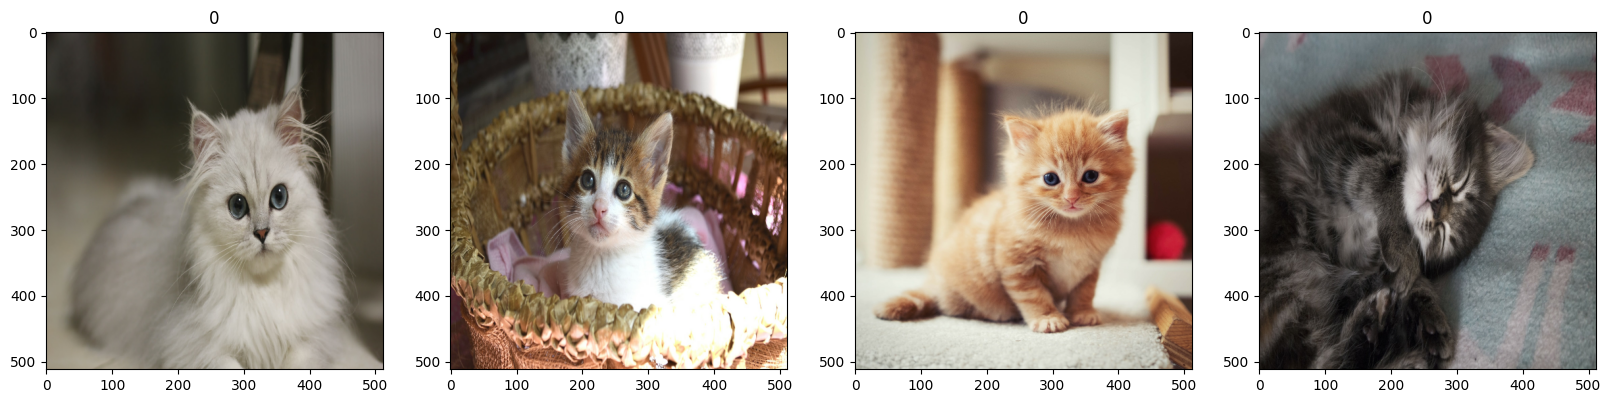

In [66]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

We see that the size of the images are all resized to 512 by 512

In [67]:
#data.as_numpy_iterator().next()
#We don't want to run this code since it will go to the next batch

We see in the previous output that the values are all between 0 and 255. We will standardize the values so that they are between 0 and 1. This will help the model compare the magnitude of the different features and assess their relative importance.

In [68]:
#standardize the data
data = data.map(lambda x,y: (x/255, y))

In [69]:
#data.as_numpy_iterator().next()
#We don't want to run this code since it will go to the next batch
#This code shows the values are between 0 and 1

## 4. Create Training/Validation/Test Data Splits

We will use 70% for training data, 20% for validation, and an additional 10% for testing. Our data will be split into 20 batches for training, 6 for validation, and 3 for test. This split is commonly used as it's a good balance between having enough data for training and validation while also ensuring that the model is evaluated on data it has not seen during training.

Training set: 70% of 29 = 0.7 x 29 = 20.3 (rounded to 20) <br>
Validation set: 20% of 29 = 0.2 x 29 = 5.8 (rounded to 6) <br>
Test set: 10% of 29 = 0.1 x 29 = 2.9 (rounded to 3)

In [70]:
# establish the training/validation/test split proportions
train_size = round(len(data)*0.7)
print('train size: ', train_size)
val_size = round(len(data)*0.2)
print('validation size: ', val_size)
test_size = round(len(data)*0.1)
print('test size: ', test_size)

train size:  20
validation size:  6
test size:  3


The following code takes the full dataset and divides it into training, validation, and test sets
train takes 20, val skips those 20 and takes 6, and test skips those and takes the remaining 3

In [71]:
# create the train/val/test datasets
train = data.take(train_size) # this takes the first x data
val = data.skip(train_size).take(val_size) # this skips the first x data and takes the next y data
test = data.skip(train_size+val_size).take(test_size) # this skips the first x + y data and takes the remaining z data

## 5. Train a Deep Learning Model

Let's move on to the training stage of our deep neural network for image classification. We will utilize TensorFlow's Sequential model via Keras.

In [72]:
# first, let's import the specific modules we need from TF
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

The Sequential model in TensorFlow is a popular deep learning architecture that consists of a linear stack of layers. Each layer performs a specific operation on the input data, transforming it into a more useful representation for the next layer. This allows for a simple and intuitive way to construct deep learning models in TensorFlow, with the ability to easily stack layers and define the flow of data through the neural network.

We need to specify the number of hidden layers and activation fuctions for each layer.

An activation function is a key component of a neural network that allows for the transformation of input signals to produce an output that can be passed on to the next layer. TensorFlow offers a variety of activation functions such as ReLU, sigmoid, and tanh which can be used to achieve different results in the model. These activation functions play a crucial role in the optimization and performance of the neural network.

MaxPooling2D is a common operation used in convolutional neural networks for image processing. It downsamples the input image in the spatial dimensions, reducing the output size of the layer, while retaining the most important information by selecting the maximum pixel value in a local region. This helps to reduce the computational cost and overfitting.

The Conv2D layer is designed to capture distinctive features from input images by performing a convolution operation with a set of learnable filters.

The flatten operation is used to transform a multi-dimensional input into a 1 dimensional array which can then be used with linear functions.

Then we add a 256 neuron hidden layer with activation ReLU to deal with the flattened output.

The output layer is the final layer of a neural network that produces the output prediction of the model.

In the code below we are sequentially adding layers and operations to our model.

In [73]:
# Instantiate the blank model
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape = (512,512,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

The above code initializes a Sequential model for image classification in TensorFlow using Keras. It then adds a Conv2D layer to extract features from the input images, followed by a MaxPooling2D layer to downsample the features. Three more Conv2D and MaxPooling2D layers are added to further extract features and reduce dimensionality.

The model then flattens the output of the last MaxPooling2D layer into a 1D array. Out output layer uses activation sigmoid that maps any input value to a value between 0 and 1 using an S-shaped curve (or sigmoid curve).

In the training process, the model adjusts its weights using a process called backpropagation to minimize the loss function, which measures how far the predicted output is from the actual output.

The optimization algorithm we will use is called 'adam' which will update the weights iteratively based on the traning data. The BinaryCrossentropy is a loss function used for binary classification problems to measure the difference between predicted and actual output. 

In [74]:
# establishing the criteria for model evaluation
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [75]:
# now let's output the summary of our model setup before officially training
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 510, 510, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 255, 255, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 253, 253, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 124, 124, 16)      4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 16)      

The above output shows a total of 3,696,625 parameters, which is a lot of learnable weights and is why neural networks are so effective.

## 6. Train and Evaluate the Deep Neural Network

We'll start training the model now. To track and analyze the model's progress, we'll generate a training log and store our performance metrics.

In [76]:
logdir = 'logs'

In [77]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [78]:
hist = model.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/25
20/20 [==============================] - 47s 2s/step - loss: 1.0940 - accuracy: 0.5391 - val_loss: 0.7278 - val_accuracy: 0.4740
Epoch 2/25
20/20 [==============================] - 45s 2s/step - loss: 0.6750 - accuracy: 0.6109 - val_loss: 0.6439 - val_accuracy: 0.6771
Epoch 3/25
20/20 [==============================] - 45s 2s/step - loss: 0.6062 - accuracy: 0.7172 - val_loss: 0.6644 - val_accuracy: 0.5417
Epoch 4/25
20/20 [==============================] - 45s 2s/step - loss: 0.5332 - accuracy: 0.7625 - val_loss: 0.5231 - val_accuracy: 0.7552
Epoch 5/25
20/20 [==============================] - 46s 2s/step - loss: 0.4118 - accuracy: 0.8531 - val_loss: 0.4257 - val_accuracy: 0.8438
Epoch 6/25
20/20 [==============================] - 45s 2s/step - loss: 0.3035 - accuracy: 0.9016 - val_loss: 0.3308 - val_accuracy: 0.8906
Epoch 7/25
20/20 [==============================] - 47s 2s/step - loss: 0.1823 - accuracy: 0.9547 - val_loss: 0.2588 - val_accuracy: 0.9115
Epoch 8/25
20/20 [==

The following plot created with matplotlib is a called loss curve and shows the change in the model's loss function over each epoch. A good model will typically shows decreasing loss and validation loss curves over the course of the epochs with the validation loss curve staying close to the loss curve. If the validation loss starts to increase while the loss continues to decrease, it can indicate that the model is overfitting to the training data.

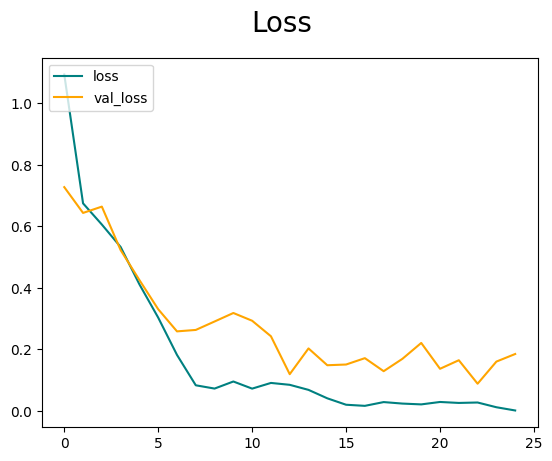

In [79]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

Although our training loss doesn't always decrease, it has an overall downward trend, which is promising. However, the validation loss is fluctuating, indicating potential overfitting, despite its overall decrease.

The plot below shows the accuracy during training. and the validation accuracy. The validation set is a separate dataset from the training dataset that the model has not seen before.

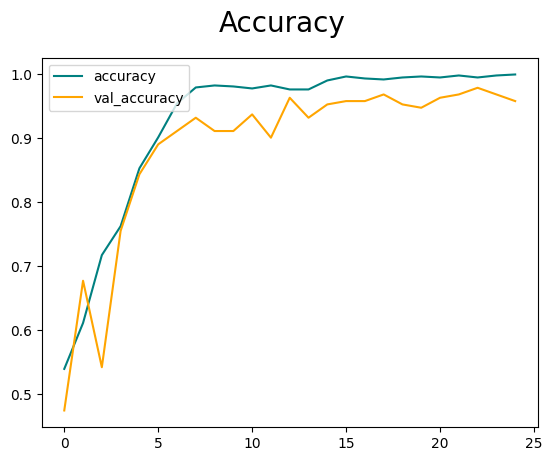

In [80]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

The accuracy curve for this model shows the model is learning and improving as training progresses, with some minor fluctuations in both the training and validation accuracy. Downward fluctuations in the validation accuracy suggests there may be some overfitting issues.

We will import modules for precision, recall and binary accuracy.
Binary accuracy is the ratio of the number of true positives and true negatives to the total number of instances in the dataset

In [81]:
# importing evaluation metrics from TensorFlow
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [82]:
# instantiate the metrics so that we can use them/update them
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [83]:
len(test)

3

Nevertheless, this next code chunk uses a for loop that can be applied to test datasets comprising multiple batches (which is rather common given that image classification models often involve many thousands of images).

In [84]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Binary Accuracy:{accuracy.result().numpy()}')

1/1 [==============================] - 0s 101ms/step
Precision:0.9722222089767456, Recall:1.0, Binary Accuracy:0.9852941036224365


Our model has very good precision, recall, and binary accuracy. <br>
Precision would mean the fraction of correctly classified puppies (1) out of all the instances that were predicted as puppies (1) by the model.<br>
Recall: The fraction of correctly classified puppies (1) out of all the actual puppies (1) in the dataset.<br>
Binary accuracy: The fraction of correctly classified instances (both kittens and puppies) out of all the instances in the dataset.

Let's use some of those test images we put into a separate test folders earlier.

In [109]:
img = cv2.imread('./test_kitten/photo-1471874276752-65e2d717604a.jpg')

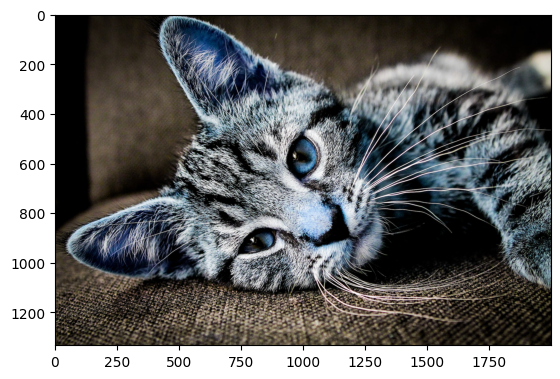

In [110]:
plt.imshow(img)
plt.show()

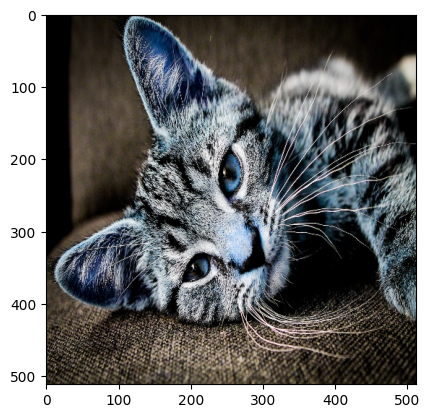

In [111]:
# resize the image to be the same as the training data's dimensions
resize = tf.image.resize(img, (512,512))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [112]:
predicted = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 47ms/step


In [113]:
predicted

array([[6.239219e-10]], dtype=float32)

In [114]:
if predicted > 0.50:
    print(f'Predicted class is Puppy')
else:
    print(f'Predicted class is Kitten')

Predicted class is Kitten


It was correctly predicted as a kitten!

Now let's loop through the test image folders.

In [115]:
kitten_test_path = r'D:\GDAA2010_Data_Modeling\Assignment2\test_kitten'
puppy_test_path = r'D:\GDAA2010_Data_Modeling\Assignment2\test_puppy'

In [116]:
puppy_count = 0
kitten_count = 0
for img_name in os.listdir(kitten_test_path):
    img_path = os.path.join(kitten_test_path, img_name)
    img = cv2.imread(img_path)
    resize = tf.image.resize(img, (512, 512))
    predicted = model.predict(np.expand_dims(resize / 255, 0))
    if predicted > 0.5:
        puppy_count += 1
        print(img_name, 'Prediction: Puppy')
    else:
        kitten_count += 1
        print(img_name, 'Prediction: Kitten')
print(f'There are {puppy_count} puppies and {kitten_count} kittens' +
      f' out of {len(os.listdir(kitten_test_path))} images')

1/1 [==============================] - 0s 38ms/step
photo-1443610762694-d993e81f69d9.jpg Prediction: Kitten
1/1 [==============================] - 0s 39ms/step
photo-1445499348736-29b6cdfc03b9.jpg Prediction: Kitten
1/1 [==============================] - 0s 38ms/step
photo-1453177831576-f53a1d91ee96.jpg Prediction: Puppy
1/1 [==============================] - 0s 36ms/step
photo-1466618786657-4df462be674e.jpg Prediction: Kitten
1/1 [==============================] - 0s 36ms/step
photo-1469569946320-b4f13e4b7d5e.jpg Prediction: Kitten
1/1 [==============================] - 0s 37ms/step
photo-1471874276752-65e2d717604a.jpg Prediction: Kitten
1/1 [==============================] - 0s 38ms/step
photo-1472491235688-bdc81a63246e.jpg Prediction: Kitten
1/1 [==============================] - 0s 37ms/step
photo-1478098711619-5ab0b478d6e6.jpg Prediction: Kitten
1/1 [==============================] - 0s 37ms/step
photo-1481139024422-2e4ce2f87975.jpg Prediction: Kitten
1/1 [========================

In [117]:
puppy_count = 0
kitten_count = 0
for img_name in os.listdir(puppy_test_path):
    img_path = os.path.join(puppy_test_path, img_name)
    img = cv2.imread(img_path)
    resize = tf.image.resize(img, (512, 512))
    predicted = model.predict(np.expand_dims(resize / 255, 0))
    if predicted > 0.5: #threshold
        puppy_count += 1
        print(img_name, 'Prediction: Puppy')
    else:
        kitten_count += 1
        print(img_name, 'Prediction: Kitten')
print(f'There are {puppy_count} puppies and {kitten_count} kittens' +
      f' out of {len(os.listdir(puppy_test_path))} images')

1/1 [==============================] - 0s 38ms/step
photo-1542619752-99e530616d04.jpg Prediction: Puppy
1/1 [==============================] - 0s 36ms/step
photo-1542976735-f64ecb935c2d.jpg Prediction: Kitten
1/1 [==============================] - 0s 36ms/step
photo-1543554618-7e19c5e393d9.jpg Prediction: Puppy
1/1 [==============================] - 0s 36ms/step
photo-1543556153-5e59781a98dc.jpg Prediction: Kitten
1/1 [==============================] - 0s 36ms/step
photo-1543606818-2e9bf5e642f3.jpg Prediction: Puppy
1/1 [==============================] - 0s 37ms/step
photo-1543607046-6748defa61f2.jpg Prediction: Kitten
1/1 [==============================] - 0s 38ms/step
photo-1544197807-bb503430e22d.jpg Prediction: Puppy
1/1 [==============================] - 0s 38ms/step
photo-1544567748-3b33fc2720c7.jpg Prediction: Kitten
1/1 [==============================] - 0s 36ms/step
photo-1544568100-847a948585b9.jpg Prediction: Kitten
1/1 [==============================] - 0s 37ms/step
photo-1

Overall we have 31+23 = 54 correct out of 100 which is a 54% accuracy. Tweaking the threshold did not help. This doesn't make sense because our model has been trained, validated, and tested. Let's run the same code and <b>copy</b> the test_kitten and test_puppy folders into a folder called data2.

In [122]:
data = tf.keras.utils.image_dataset_from_directory('data',
                                                   color_mode='rgb',
                                                   batch_size=32,
                                                   image_size=(512, 512))
data = data.map(lambda x,y: (x/255, y))
val = tf.keras.utils.image_dataset_from_directory('data2',
                                                   color_mode='rgb',
                                                   batch_size=32,
                                                   image_size=(512, 512))
val = val.map(lambda x,y: (x/255, y))

model2 = Sequential()
model2.add(Conv2D(16, (3,3), 1, activation='relu', input_shape = (512,512,3)))
model2.add(MaxPooling2D())
model2.add(Conv2D(32, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Conv2D(16, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
logdir2 = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir2)
hist2 = model2.fit(data, epochs=25, validation_data=val, callbacks=[tensorboard_callback])

Found 900 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Epoch 1/25
29/29 [==============================] - 53s 2s/step - loss: 1.2750 - accuracy: 0.5067 - val_loss: 0.6807 - val_accuracy: 0.5600
Epoch 2/25
29/29 [==============================] - 52s 2s/step - loss: 0.6777 - accuracy: 0.5611 - val_loss: 0.6379 - val_accuracy: 0.6700
Epoch 3/25
29/29 [==============================] - 52s 2s/step - loss: 0.6347 - accuracy: 0.6544 - val_loss: 0.6321 - val_accuracy: 0.6200
Epoch 4/25
29/29 [==============================] - 53s 2s/step - loss: 0.5824 - accuracy: 0.7133 - val_loss: 0.6491 - val_accuracy: 0.5900
Epoch 5/25
29/29 [==============================] - 53s 2s/step - loss: 0.5447 - accuracy: 0.7544 - val_loss: 0.6401 - val_accuracy: 0.6700
Epoch 6/25
29/29 [==============================] - 54s 2s/step - loss: 0.4264 - accuracy: 0.8222 - val_loss: 0.7338 - val_accuracy: 0.6100
Epoch 7/25
29/29 [==============================] - 54s 2s/step - loss: 0.2797 -

Our training accuracy is 0.9978 and our validation accuracy is 0.67. It looks like the model is overfitting to the training data. This makes sense because going through the images there are multiple images of the same puppy or kitten. To increase the performance of our model on untrained data, we could remove them from the dataset.

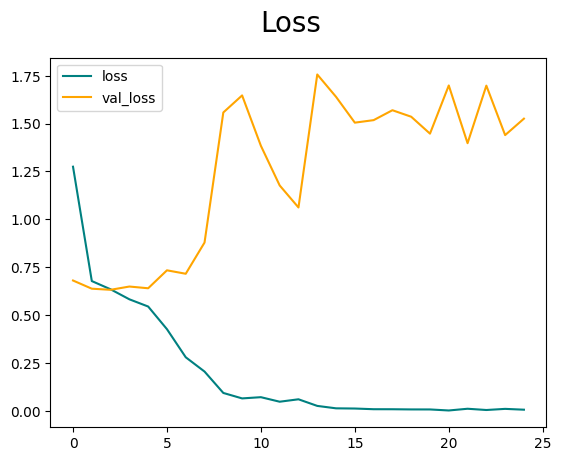

In [123]:
fig = plt.figure()
plt.plot(hist2.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist2.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

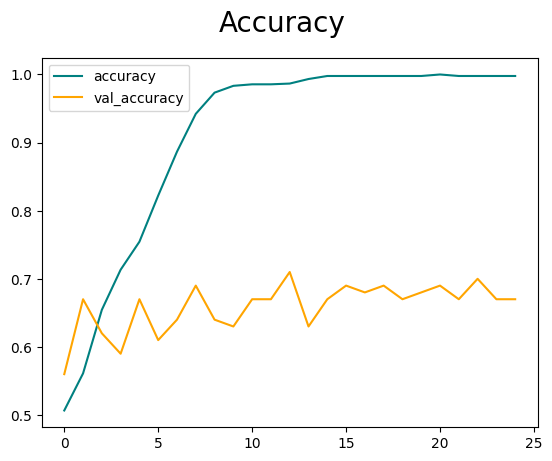

In [124]:
fig = plt.figure()
plt.plot(hist2.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist2.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

This model seems to be a more accurate representation than the other one. Our model is not very good at predicting kittens and puppies.
When a model is overfitting, it is often because it has learned the noise in the training data instead of the underlying patterns.
Adding more data could help the model as the model has more examples to learn from and is less likely to overfit to specific examples or noise in the data. This is why deep learning usually requires large amounts of data to perform well.

# Save/Export Model

We can save our model once it's done training! To do this import tensorflow's load_model package.

In [263]:
from tensorflow.keras.models import load_model

In [264]:
# This saves the model into a folder 'models' with the spicified name.
# The file format h5 is used for deep learning models.
model.save(os.path.join('models','A2_Kitten_Puppy_Classifier.h5'))

To load your model, simply use the load_model function. This will load the pre-trained model into memory so that it can be used for making predictions on new data or fine-tuning for further training.

In [265]:
new_model = load_model(os.path.join('models','A2_Kitten_Puppy_Classifier.h5'))

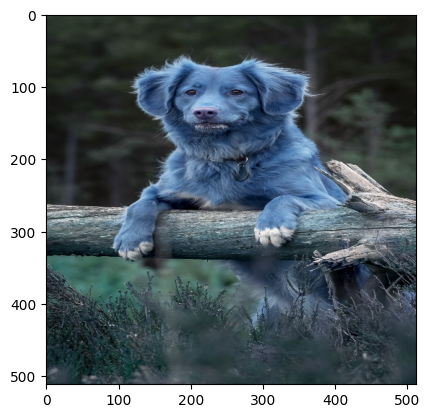

In [107]:
plt.imshow(resize.numpy().astype(int))
plt.show()

In [268]:
new_prediction = new_model.predict(np.expand_dims(resize / 255, 0))

1/1 [==============================] - 0s 96ms/step


In [269]:
if new_prediction > 0.5:
    print(f'Predicted class is Puppy')
else:
    print(f'Predicted class is Kitten')

Predicted class is Kitten
